Generating and clustering blob-like data...
Finished with num_clusters=4 and iter=10


/tmp/ipykernel_3268/4076085811.py:75: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


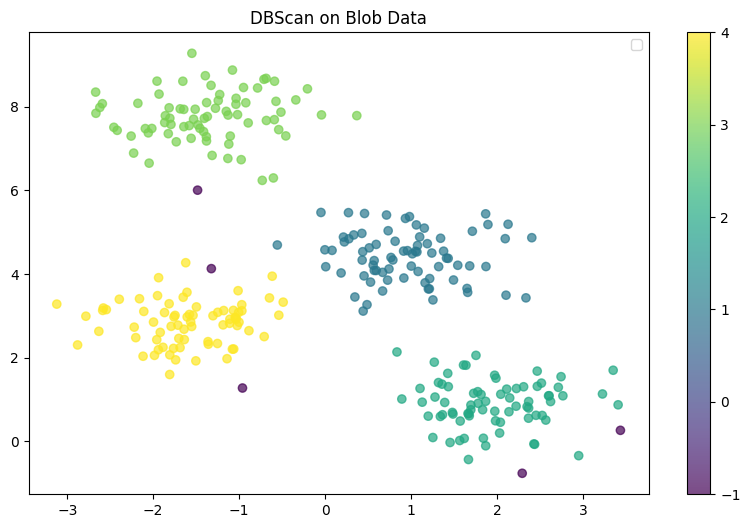


Generating and clustering circular data...
Finished with num_clusters=2 and iter=3


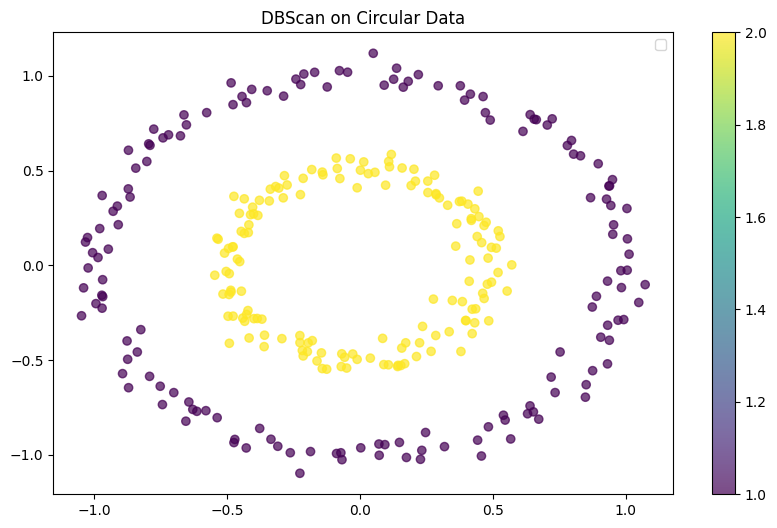


Generating and clustering moon-shaped data...
Finished with num_clusters=2 and iter=3


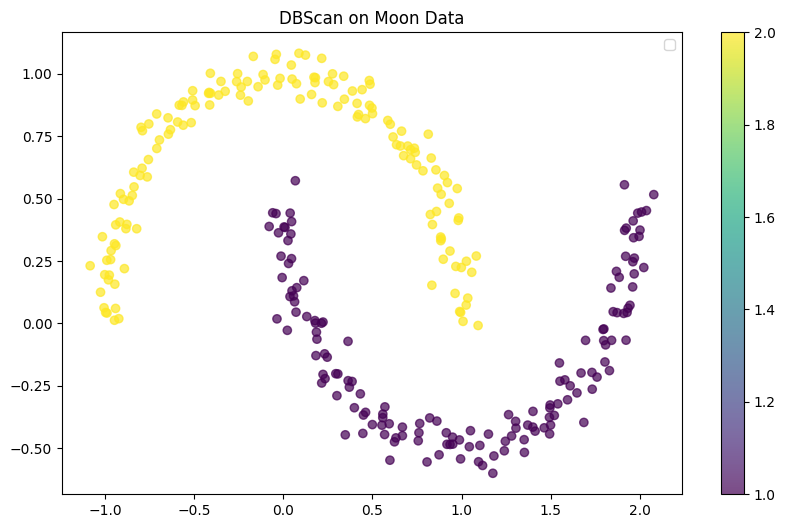


Generating and clustering random data with different variances...
Finished with num_clusters=3 and iter=5


/tmp/ipykernel_3268/4076085811.py:75: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


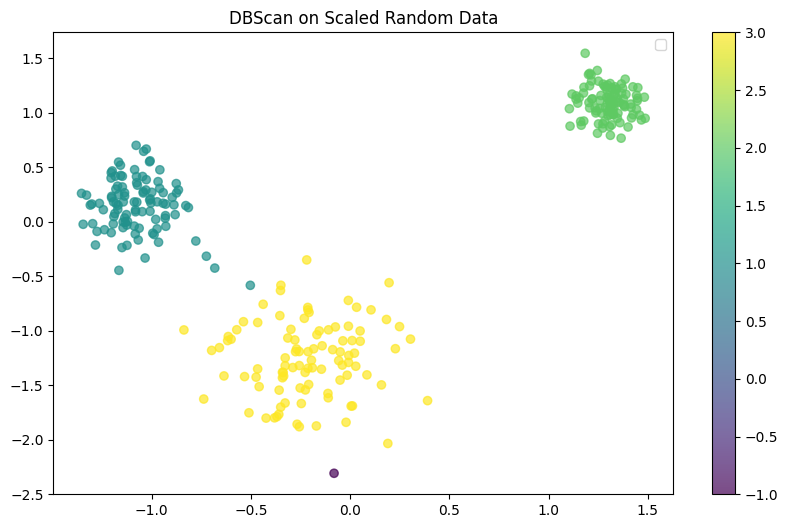

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
import numpy as np

class DBScan:
    def __init__(self, max_iter=1000, min_pts=3, eps=0.5, random_state=0):
        self.max_iter = max_iter
        self.min_pts = min_pts
        self.eps = eps
        if random_state is not None:
            np.random.seed(random_state)
 
    def _pick_unvisited_index(self, X, labels):
        unvisited_indices = np.argwhere(labels == 0)
        if len(unvisited_indices) == 0:
            return -1 # there are no more points to visit
        return np.random.choice(unvisited_indices.ravel(), size=1, replace=False)[0]

    def _get_close_unlabeled_indices(self, idx, X, labels):
        diff = X - X[idx]
        distances = np.sqrt(np.sum(diff * diff, axis=1))
        close_indices = np.argwhere(distances <= self.eps)
        unlabeled_indices = np.argwhere(labels < 1)
        return np.intersect1d(close_indices, unlabeled_indices, assume_unique=True)

    def _grow_cluster(self, clabel, idx, X, labels):
        labels[idx] = clabel
        close_indices = self._get_close_unlabeled_indices(idx, X, labels)
        if len(close_indices) < self.min_pts:
            #we're at the cluster border so finish labeling and bail
            for i in close_indices:
                labels[i] = clabel
        else:
            #we're at a core point
            for i in close_indices:
                labels = self._grow_cluster(clabel, i, X, labels)
        return labels

    def fit(self, X):
        labels = np.zeros(np.shape(X)[0])
        num_clusters = 0
        iter = 0
        while iter < self.max_iter:
            iter += 1
            idx = self._pick_unvisited_index(X, labels)
            if idx == -1:
                break # we ran out of points to visit i.e. we're done
            close_indices = self._get_close_unlabeled_indices(idx, X, labels)
            if len(close_indices) < self.min_pts:
                labels[idx] = -1 # we're at an outlier, probably
                continue
            num_clusters += 1
            labels[idx] = num_clusters
            for i in close_indices:
                labels = self._grow_cluster(num_clusters, i, X, labels)
    
        self.labels = labels
        print("Finished with num_clusters=%d and iter=%d"%(num_clusters, iter))


def plot_clusters(X, dbscan, title):
    """Helper function to plot clusters and centroids"""
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels, cmap='viridis', alpha=0.7)
    '''plt.scatter(
        dbscan.centroids[:, 0],
        dbscan.centroids[:, 1],
        c='red',
        marker='x',
        s=200,
        linewidth=3,
        label='Centroids'
    )'''
    plt.title(title)
    plt.legend()
    plt.colorbar()
    plt.show()

def main():

    # 1. Simple blob-like clusters
    print("Generating and clustering blob-like data...")
    X_blobs, _ = make_blobs(
        n_samples=300,
        centers=4,
        cluster_std=0.60,
        random_state=0
    )
    
    dbscan_blobs = DBScan(min_pts=2, eps=0.6, max_iter=100)
    dbscan_blobs.fit(X_blobs)
    plot_clusters(X_blobs, dbscan_blobs, "DBScan on Blob Data")

    # 2. Concentric circles
    print("\nGenerating and clustering circular data...")
    X_circles, _ = make_circles(n_samples=300, noise=0.05, factor=0.5)
    dbscan_circles = DBScan(min_pts=3, eps=0.2, max_iter=100)
    dbscan_circles.fit(X_circles)
    plot_clusters(X_circles, dbscan_circles, "DBScan on Circular Data")

    # 3. Moon-shaped clusters
    print("\nGenerating and clustering moon-shaped data...")
    X_moons, _ = make_moons(n_samples=300, noise=0.05)
    dbscan_moons = DBScan(min_pts=3, eps=0.3, max_iter=100)
    dbscan_moons.fit(X_moons)
    plot_clusters(X_moons, dbscan_moons, "DBScan on Moon Data")

   # 4. Random clusters with different variances
    print("\nGenerating and clustering random data with different variances...")
    random_centers = [(0, 0), (5, 5), (-3, 3)]
    X_random = []
    for cx, cy in random_centers:
        cluster = np.random.randn(100, 2) * np.random.uniform(0.3, 1.5)
        cluster += np.array([cx, cy])
        X_random.append(cluster)
    X_random = np.vstack(X_random)

    from sklearn.preprocessing import StandardScaler
    # Scale the data
    scaler = StandardScaler()
    X_random_scaled = scaler.fit_transform(X_random)
    
    dbscan_random = DBScan(min_pts=7, eps=0.3, max_iter=100)
    dbscan_random.fit(X_random_scaled)
    plot_clusters(X_random_scaled, dbscan_random, "DBScan on Scaled Random Data")

   
if __name__ == "__main__":
    main()